In [32]:
import matplotlib.pyplot as plt 

from dredFISH.Analysis import TissueGraph as tgh
from dredFISH.Analysis import regu
import importlib
importlib.reload(tgh)
importlib.reload(regu)
# from dredFISH.Analysis.TissueGraph import *
# from dredFISH.Visualization.Viz import *
import logging
logging.basicConfig(level=logging.INFO)

## Load data

In [20]:
%%time
ccf = np.load('/bigstore/binfo/mouse/Brain/average_template.npy')
ccf.shape

array([[-2413.58650925,  3496.71287912],
       [-2412.2924244 ,  3443.82125943],
       [-2413.86476218,  3264.86541089],
       ...,
       [ -414.58005688,  3313.17069568],
       [ -415.74334204,  3335.268     ],
       [ -415.90045239,  3345.51451587]])

In [19]:
%%time
base_path = '/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/'
fish_path = f'{base_path}fishdata_2022Mar23/'
anndata_path = f'{base_path}results/raw_fishdata_Mar24.h5ad'
dataset = 'DPNMF_PolyA_2021Nov19'

TMG = tgh.TissueMultiGraph()

# load data
if os.path.isfile(anndata_path):
    print('from AnnData')
    TMG.load_from_anndata(anndata_path)
else:
    print('from FishData')
    TMG.load_from_fishdata(fish_path, dataset, output_path=anndata_path)
    
# # normalize (optional for spatial registration)
# TMG.normalize_data(norm_cell=True, norm_bit=True)

from AnnData
CPU times: user 301 ms, sys: 104 ms, total: 405 ms
Wall time: 405 ms


In [18]:
# TMG.data.layers['norm_bit']
TMG.data.obs

,label,pixel_x,pixel_y,nuclei_size,nuclei_signal,cytoplasm_size,cytoplasm_signal,total_size,total_signal,posname,posname_stage_x,posname_stage_y,cell_name,stage_x,stage_y
DPNMF_PolyA_2021Nov19_Pos98_cell_1.0,1.0,11.001562,86.770309,640.0,25904.0,223.0,25840.0,851.0,25984.0,Pos98,-2410.0,3525.0,DPNMF_PolyA_2021Nov19_Pos98_cell_1.0,-2413.586509,3496.712879
DPNMF_PolyA_2021Nov19_Pos98_cell_2.0,2.0,7.031977,249.014542,344.0,10288.0,86.0,14240.0,428.0,10944.0,Pos98,-2410.0,3525.0,DPNMF_PolyA_2021Nov19_Pos98_cell_2.0,-2412.292424,3443.821259
DPNMF_PolyA_2021Nov19_Pos98_cell_3.0,3.0,11.855099,797.958862,559.0,40080.0,185.0,34112.0,737.0,38256.0,Pos98,-2410.0,3525.0,DPNMF_PolyA_2021Nov19_Pos98_cell_3.0,-2413.864762,3264.865411
DPNMF_PolyA_2021Nov19_Pos98_cell_4.0,4.0,14.233974,951.783630,624.0,40800.0,305.0,38144.0,800.0,42784.0,Pos98,-2410.0,3525.0,DPNMF_PolyA_2021Nov19_Pos98_cell_4.0,-2414.640276,3214.718536
DPNMF_PolyA_2021Nov19_Pos98_cell_5.0,5.0,4.344828,986.775879,174.0,49776.0,174.0,44896.0,336.0,48496.0,Pos98,-2410.0,3525.0,DPNMF_PolyA_2021Nov19_Pos98_cell_5.0,-2411.416414,3203.311063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPNMF_PolyA_2021Nov19_Pos102_cell_1357.0,1357.0,2041.041992,695.351379,333.0,53968.0,306.0,42000.0,639.0,48800.0,Pos102,251.0,3525.0,DPNMF_PolyA_2021Nov19_Pos102_cell_1357.0,-414.379689,3298.315450
DPNMF_PolyA_2021Nov19_Pos102_cell_1358.0,1358.0,2037.588257,1224.082397,85.0,39376.0,1197.0,43952.0,1324.0,43760.0,Pos102,251.0,3525.0,DPNMF_PolyA_2021Nov19_Pos102_cell_1358.0,-413.253772,3125.949138
DPNMF_PolyA_2021Nov19_Pos102_cell_1359.0,1359.0,2041.656616,649.783142,166.0,26304.0,398.0,32912.0,564.0,31136.0,Pos102,251.0,3525.0,DPNMF_PolyA_2021Nov19_Pos102_cell_1359.0,-414.580057,3313.170696
DPNMF_PolyA_2021Nov19_Pos102_cell_1360.0,1360.0,2045.224976,582.000000,80.0,10432.0,145.0,20800.0,201.0,18336.0,Pos102,251.0,3525.0,DPNMF_PolyA_2021Nov19_Pos102_cell_1360.0,-415.743342,3335.268000


## Spatial

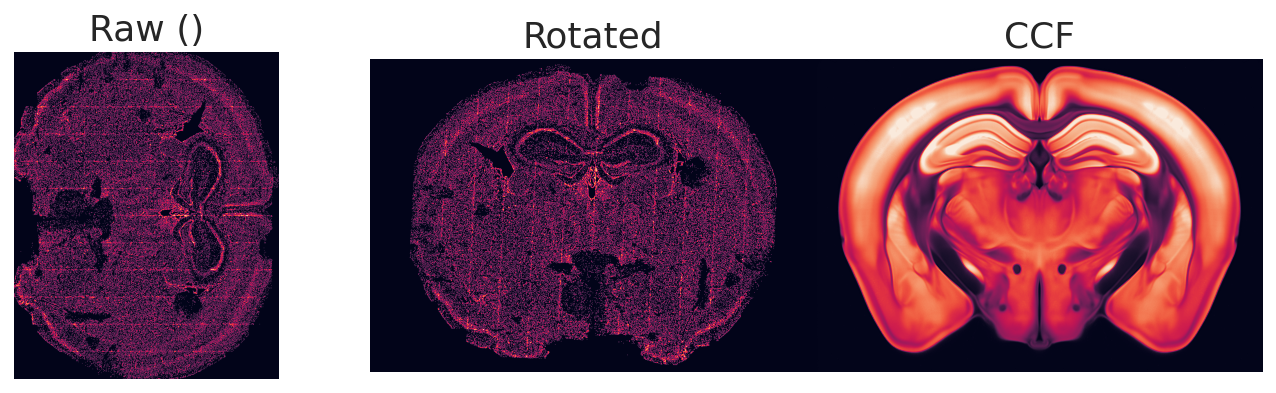

CPU times: user 5.81 s, sys: 646 ms, total: 6.46 s
Wall time: 1.2 s


In [26]:
%%time
XY = TMG.data.obs[['stage_x', 'stage_y']].values
idx_ccf = 720
flip = False

regu.check_run(XY, ccf, idx_ccf, flip=flip)

saved to /bigstore/GeneralStorage/fangming/dredfish/DPNMF_PolyA_2021Nov19_v1registered.hdf5


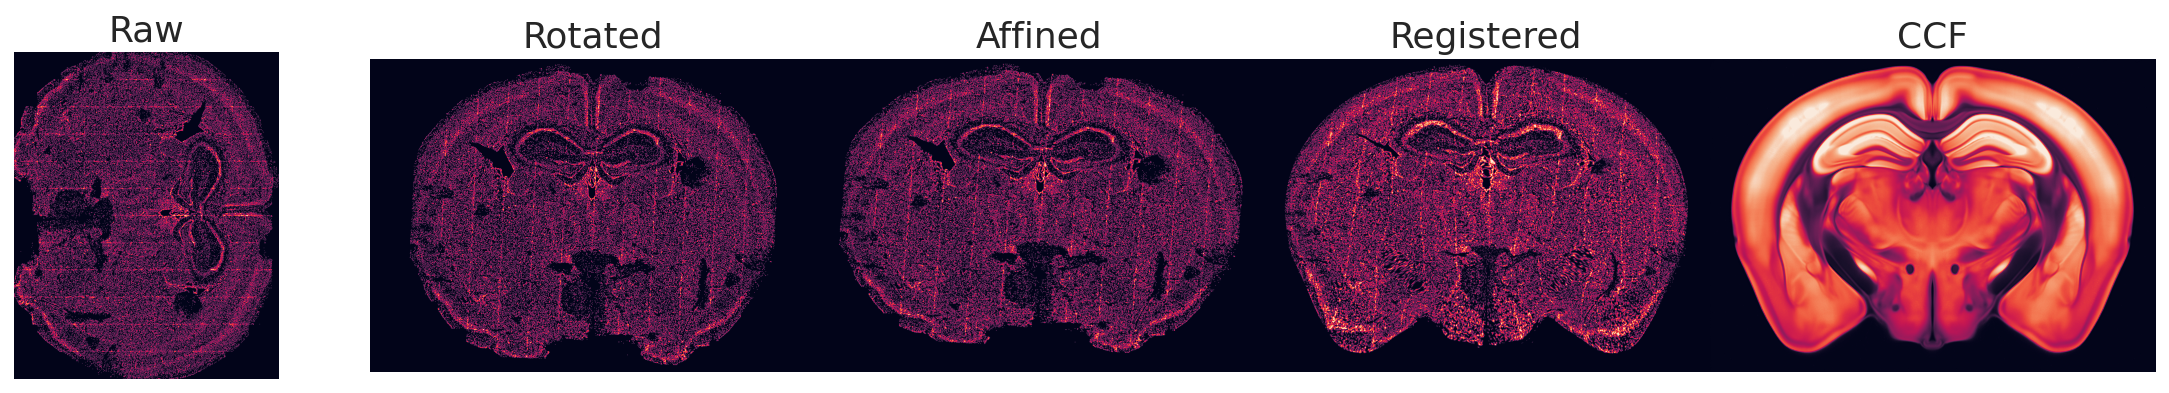

In [34]:
regu.real_run(XY, ccf, idx_ccf, flip=flip, 
              dataset=dataset, # a name
              outprefix=f"/bigstore/GeneralStorage/fangming/dredfish/{dataset}_v1", 
              force=True,
             )

In [ ]:

# dataset='dredfish'
# set up configs

flip = False
idx_ccf = 720

# dataset
force = True
outprefix = res_dir + f'{dataset}_v2_'
outprefix_affine = outprefix + 'affine_'
outprefix_syn = outprefix + 'syn_'
output = outprefix + 'registered.hdf5'

# check output files
# outprefix = ''
if outprefix:
    files = glob.glob(outprefix+'*')
    if len(files) > 0:
        if force: 
            for file in files:
                os.remove(file)
        else:
            raise ValueError(f'Files with {outprefix} existed')



In [ ]:
# set up configs
file = paths[dataset]
flip = flip_configs[dataset]
idx_ccf = matched_ccf_plates[dataset]

# dataset
outprefix = res_dir + f'{dataset}_v2_'
outprefix_affine = outprefix + 'affine_'
outprefix_syn = outprefix + 'syn_'
output = outprefix + 'registered.hdf5'
force = True


# check output files
# outprefix = ''
if outprefix:
    files = glob.glob(outprefix+'*')
    if len(files) > 0:
        if force: 
            for file in files:
                os.remove(file)
        else:
            raise ValueError(f'Files with {outprefix} existed')

# load data
df = pd.read_csv(file, header=None, names=['x', 'y'])
print(dataset, df.shape)

# initiation
data = regu.Data(dataset, df.values)
# rotate
data.pca_rotate()
if flip:
    data.flip_rotated()
# add CCF
data.add_matched_ccf(idx_ccf, ccf[idx_ccf,:,:])
# pad to ccf
data.pad()

# affine
data.run_affine(outprefix_affine)
# syn
data.run_syn(
    outprefix_syn,
    type_of_transform='SyNOnly', # SyNCC (CC) or SyNOnly (MI)
    syn_metric='MI', # 'CC' 5
    syn_sampling=20, # sync_sampling determines nbins or region radius meansquares, CC, MI/mattes, demons
    verbose=False,
    grad_step=0.2, # step of gradient
    flow_sigma=3, # gaussian regularize the flow but not everything
    total_sigma=0, # ?
    reg_iterations=(100, 100, 50, 30, 0), 
    # **kwargs,
    )
# save
data.save(output, force=True)

# check results
data.render_all_comparison()